In [1]:
# ---
# Author: Airlangga Yudiatama
# Id: 2007412016
# ---

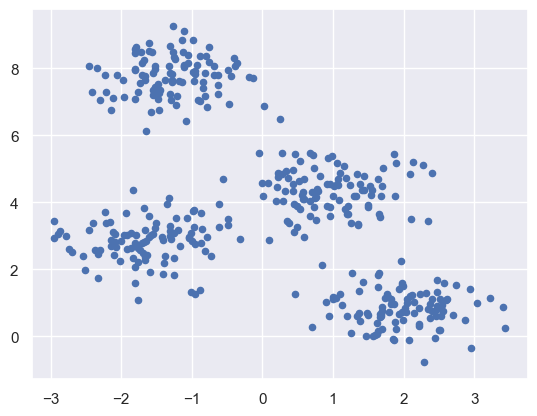

In [2]:
#CLUSTERING ALGORITHM

#-K-Means Clustering Algorithm
#--Example 1
#---import Packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

#---generate 2D contain four blobs
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)

#---visualize dataset
plt.scatter(X[:, 0], X[:, 1], s=20);
plt.show()

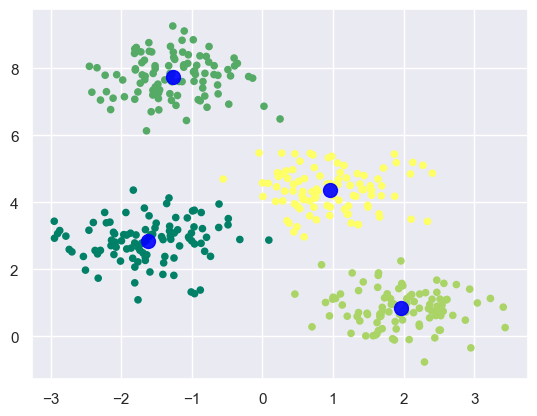

In [3]:
#---train the model and do the prediction
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

#---plot and visualize the cluster’s centers picked by k-means Python estimator
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='summer')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

In [4]:
#--Example 2
#---import necessary packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

#---find number of rows and columns
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

#---perform clustering from Example 1
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

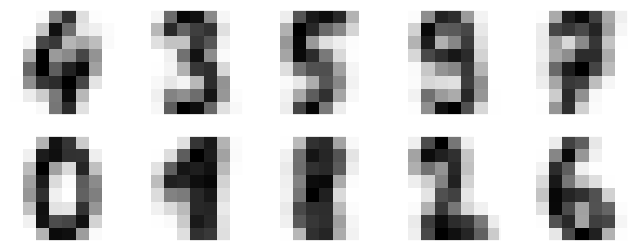

In [5]:
#---show clusters centers learned by k-means
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [6]:
#---match the learned cluster labels with the true labels
from scipy.stats import mode
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]
#---check the accuracy
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

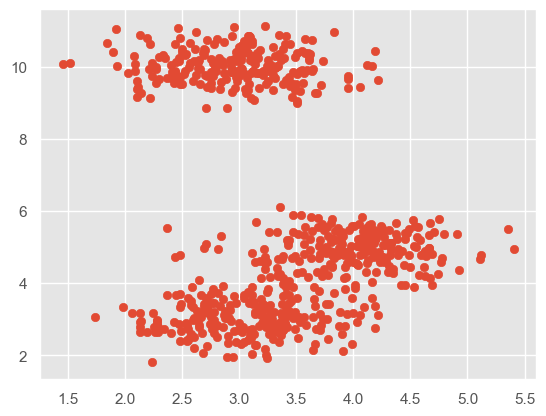

In [7]:
#-Mean-Shift Algorithm
#--Example
#---generate 2D dataset containing 4 different blobs
%matplotlib inline
import numpy as np
from sklearn.cluster import MeanShift
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from sklearn.datasets import make_blobs
centers = [[3,3,3],[4,5,5],[3,10,10]]
X, _ = make_blobs(n_samples = 700, centers = centers, cluster_std = 0.5)
plt.scatter(X[:,0],X[:,1])
plt.show()

[[ 4.00127742  4.90582148  4.99036719]
 [ 2.94765708 10.02622648 10.00991568]
 [ 3.0565122   3.01018429  3.00487567]]
Estimated clusters: 3


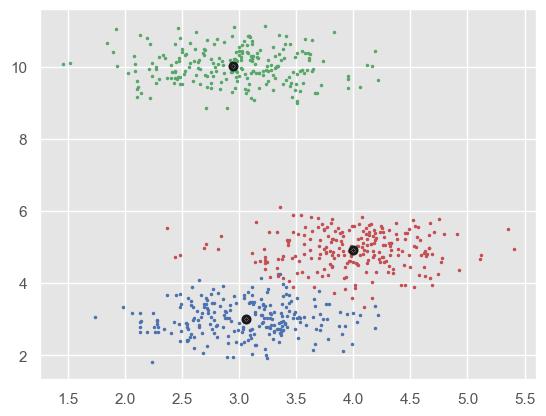

In [8]:
#---apply Mean-Shift algorithm
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
print(cluster_centers)
n_clusters_ = len(np.unique(labels))
print("Estimated clusters:", n_clusters_)
colors = 10*['r.','g.','b.','c.','k.','y.','m.']
for i in range(len(X)):
    plt.plot(X[i][0], X[i][1], colors[labels[i]], markersize = 3)
plt.scatter(cluster_centers[:,0],cluster_centers[:,1],
    marker=".",color='k', s=20, linewidths = 5, zorder=10)
plt.show()

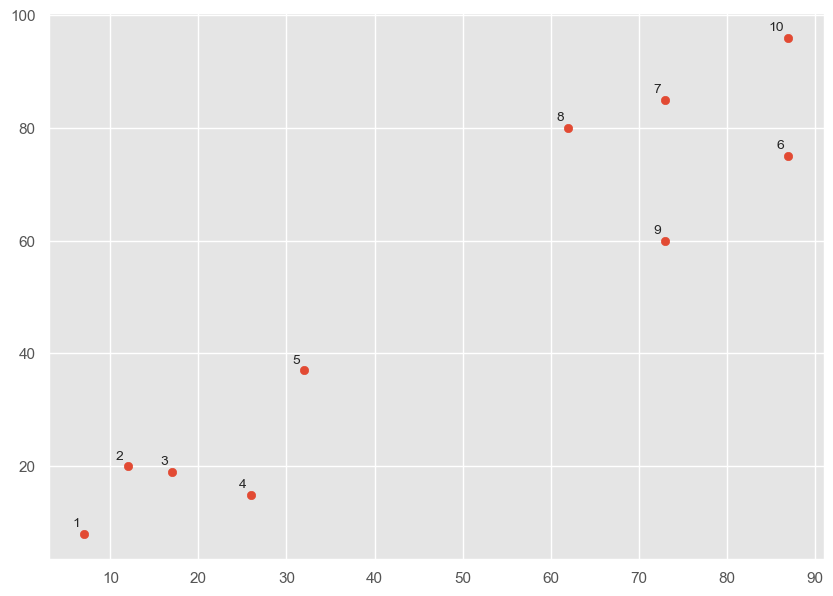

In [9]:
#-Hierarchical Clustering
#--Example 1
#---import required libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#---plotting datapoints
X = np.array([[7,8],[12,20],[17,19],[26,15],[32,37],[87,75],[73,85], [62,80],[73,60],[87,96],])
labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')
for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.annotate(label,xy=(x, y), xytext=(-3, 3),textcoords='offset points', ha='right', va='bottom')
plt.show()

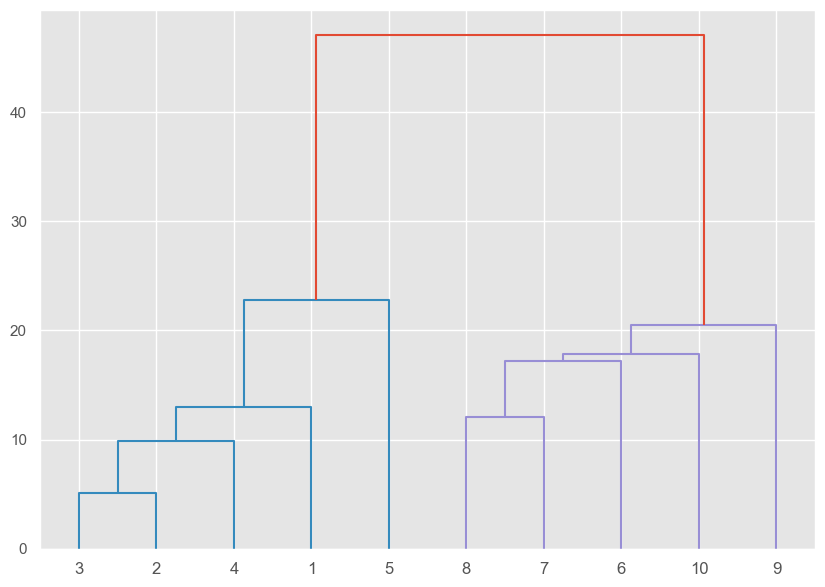

In [10]:
#---plotting dendrograms using Scipy library
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
linked = linkage(X, 'single')
labelList = range(1, 11)
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top',labels=labelList, distance_sort='descending',show_leaf_counts=True)
plt.show()

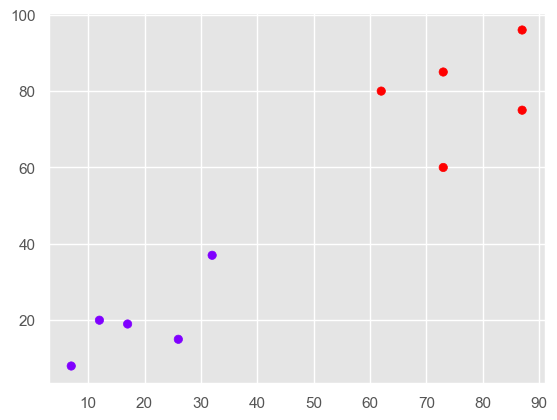

In [11]:
#---predict the cluster
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

#---plot the cluster
plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [12]:
#--Example 2
#---creating clusters of the data point in Pima Indian Diabetes Dataset
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np
from pandas import read_csv
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]
data.shape
(768, 9)
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


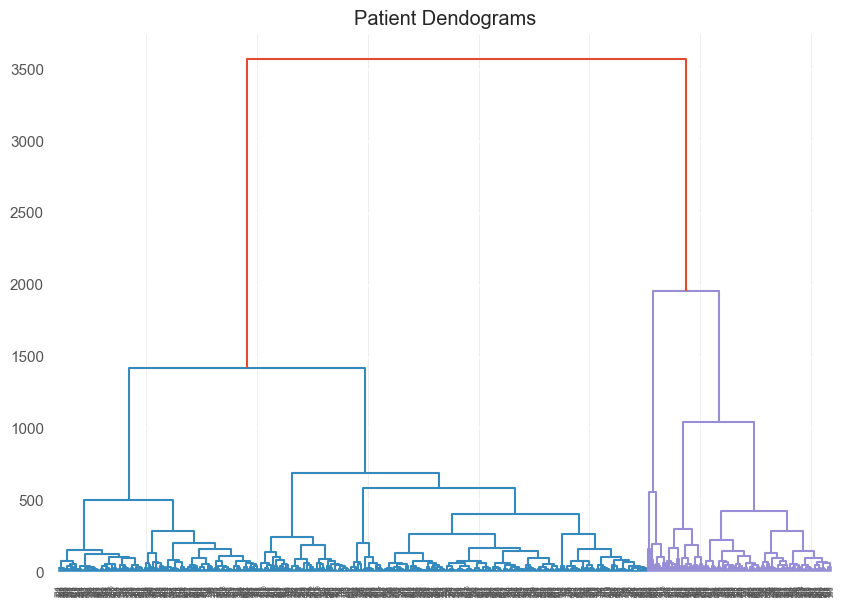

In [13]:
#---plotting dendrograms
patient_data = data.iloc[:, 3:5].values
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))
plt.title("Patient Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

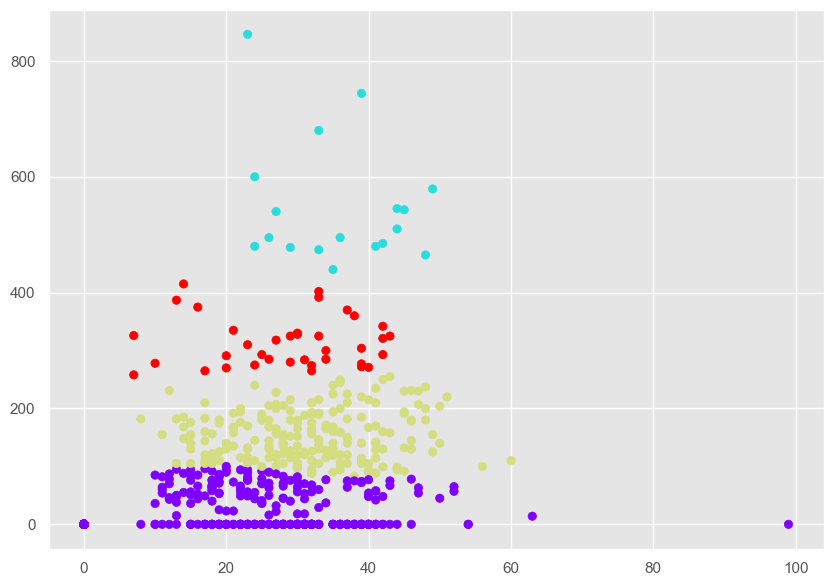

In [14]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(patient_data)
plt.figure(figsize=(10, 7))
plt.scatter(patient_data[:,0], patient_data[:,1], c=cluster.labels_, cmap='rainbow')

In [15]:
# KKN ALGORITHM

#-KNN as Classifier
#--Example
#---import necessary python packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#---download iris dataset
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#---asign column names
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#---read dataset to pandas
dataset = pd.read_csv(path, names=headernames)
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
#---ignore future warning
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

#---helping data processing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

#---divide the data into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

#---data scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#---train model with KNeighborClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

#---make prediction
y_pred = classifier.predict(X_test)

#---print result
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[19  0  0]
 [ 0 22  0]
 [ 0  3 16]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.88      1.00      0.94        22
 Iris-virginica       1.00      0.84      0.91        19

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.96      0.95      0.95        60

Accuracy: 0.95


In [17]:
#-KKN as Regressor
#--Example
#---import necessary python packages
import numpy as np
import pandas as pd

#---download iris dataset
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

#---asign column name to dataset
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

#---read dateset to pandas dataframe
data = pd.read_csv(path, names=headernames)
array = data.values
X = array[:,:2]
Y = array[:,:2]
data.shape

(150, 5)

In [18]:
#---import KNeighborRegressor
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor(n_neighbors=10)
knnr.fit(X, Y)

#---find the MSE
print ("The MSE is:",format(np.power(Y-knnr.predict(X),2).mean()))

The MSE is: 0.013190666666666665


In [19]:
#-Performance Metrics
#--Example
#---explain performance metrics on binary classification model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
X_actual = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
Y_predic = [1, 0, 1, 1, 1, 0, 1, 1, 0, 0]
results = confusion_matrix(X_actual, Y_predic)
print ('Confusion Matrix :')
print(results)
print ('Accuracy Score is',accuracy_score(X_actual, Y_predic))
print ('Classification Report : ')
print (classification_report(X_actual, Y_predic))
print('AUC-ROC:',roc_auc_score(X_actual, Y_predic))
print('LOGLOSS Value is',log_loss(X_actual, Y_predic))

Confusion Matrix :
[[3 3]
 [1 3]]
Accuracy Score is 0.6
Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.50      0.75      0.60         4

    accuracy                           0.60        10
   macro avg       0.62      0.62      0.60        10
weighted avg       0.65      0.60      0.60        10

AUC-ROC: 0.625
LOGLOSS Value is 13.815750437193334


In [20]:
#-Performance Metrics for Regression Problems
#--Example
#---Mean Absolute Error (MAE), Mean Square Error (MSE), and R Squared
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
X_actual = [5, -1, 2, 10]
Y_predic = [3.5, -0.9, 2, 9.9]
print ('R Squared =',r2_score(X_actual, Y_predic))
print ('MAE =',mean_absolute_error(X_actual, Y_predic))
print ('MSE =',mean_squared_error(X_actual, Y_predic))

R Squared = 0.9656060606060606
MAE = 0.42499999999999993
MSE = 0.5674999999999999


In [21]:
#-Modeling ML Pipeline and Data Preparation
#--Example
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values

#---create pipeline
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('lda', LinearDiscriminantAnalysis()))
model = Pipeline(estimators)

#---evaluate pipeline and output accuracy
kfold = KFold(n_splits=20, random_state=7, shuffle=True)
X = array[:,0:8]
Y = array[:,8]
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7759446693657219


In [22]:
#-Modelling ML Pipeline and Feature Extraction
#--Example
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

#---load the Pima diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values

#---create future union
features = []
features.append(('pca', PCA(n_components=3)))
features.append(('select_best', SelectKBest(k=6)))
feature_union = FeatureUnion(features)

#---create pipeline
estimators = []
estimators.append(('feature_union', feature_union))
estimators.append(('logistic', LogisticRegression(max_iter=300)))
model = Pipeline(estimators)

#----evaluate pipeline and output accuracy
kfold = KFold(n_splits=20, random_state=7, shuffle=True)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7745951417004048


In [23]:
#-Bagging Ensamble Algorithm
#--Bagged Decision Tree
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

#---load the Pima diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---give the input for 10-fold cross validation
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()

#---building 150 trees
num_trees = 150

#---build the model
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)

#---calculate and print result
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7630211893369789


In [24]:
#--Random Forest
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---give the input for 10-fold cross validation
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

#---building 150 trees with split points chosen from 5 features
num_trees = 150
max_features = 5

#---build the model
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

#---calculate and print result
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7630895420369106


In [25]:
#--Extra Trees
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesClassifier

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---give the input for 10-fold cross validation
seed = 7
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

#---building 150 trees with split points chosen from 5 features
num_trees = 150
max_features = 5

#---build the model
model = ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)

#---calculate and print the result
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7656527682843473


In [26]:
#-Boosting Ensemble Algorithms
#--AdaBoost
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#give the input for 10-fold cross validation
seed = 5
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

#---building 150 trees with split points chosen from 5 features
num_trees = 50

#---build the model
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)

#---calculate and print result
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7616883116883117


In [27]:
#--Stochastic Gradient Boosting
#---import required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---give the input for 10-fold cross validation
seed = 5
kfold = KFold(n_splits=10, random_state=seed, shuffle=True)

#---building 150 trees with split points chosen from 5 features
num_trees = 50

#---calculate and print the result
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.7616883116883117


In [28]:
#-Voting Ensemble Algorithms
#---import the required packages
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---give the input for 10-fold cross validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)

#---create sub-models as follow
estimators = []
model1 = LogisticRegression(max_iter=300)
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

#-reate the voting ensemble mode
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X, Y, cv=kfold)
print(results.mean())

0.7682672590567327


In [29]:
#-Performance Improvement with Algorithm Tuning
#--Grid Search Parameter Tuning
#---import required packages
import numpy
from pandas import read_csv
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---evaluate various alpha values
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)

#---apply grid search
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

#---print the result
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.27610844129292433
1.0


In [30]:
#--Random Search Parameter Tuning
#---import required packages
import numpy
from pandas import read_csv
from scipy.stats import uniform
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

#---load Pima Diabetes dataset
path = r'pima-indians-diabetes.csv'
headernames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = read_csv(path, names=headernames)
array = data.values
X = array[:,0:8]
Y = array[:,8]

#---evaluate the various alpha values on Ridge regression algorithm
param_grid = {'alpha': uniform()}
model = Ridge()
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=50,
random_state=7)
random_search.fit(X, Y)

#---print the result 
print(random_search.best_score_)
print(random_search.best_estimator_.alpha)

0.27610755734028525
0.9779895119966027
